<h1>Bike Sharing Assignment</h1>
<h2>Problem Statement</h2>
<P>Bommbike have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands</P>

<h2>Business Goal</h2>

<p>We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customers expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. </p> 



## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [83]:
import numpy as np
import pandas as pd
import calendar
from datetime import datetime, date

In [3]:
df = pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<h3>Dropping Instant column</h3>

In [9]:
df.drop('instant', axis=1, inplace=True)

**We can observe that**

 - No Nulls in data
 - dteday should be date
 - season, yr, mnth, holiday,weekday, workingday, weathersit should be category

**So we'll convert them correspondingly**

In [10]:
# convert columns to category
cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df[cat_columns] = df[cat_columns].astype('category')
df.dtypes

dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [11]:
# convert dteday as date
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df.dtypes

dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


## Step 2: Visualising the Data
We'll visualise our data using `matplotlib` and `seaborn`.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

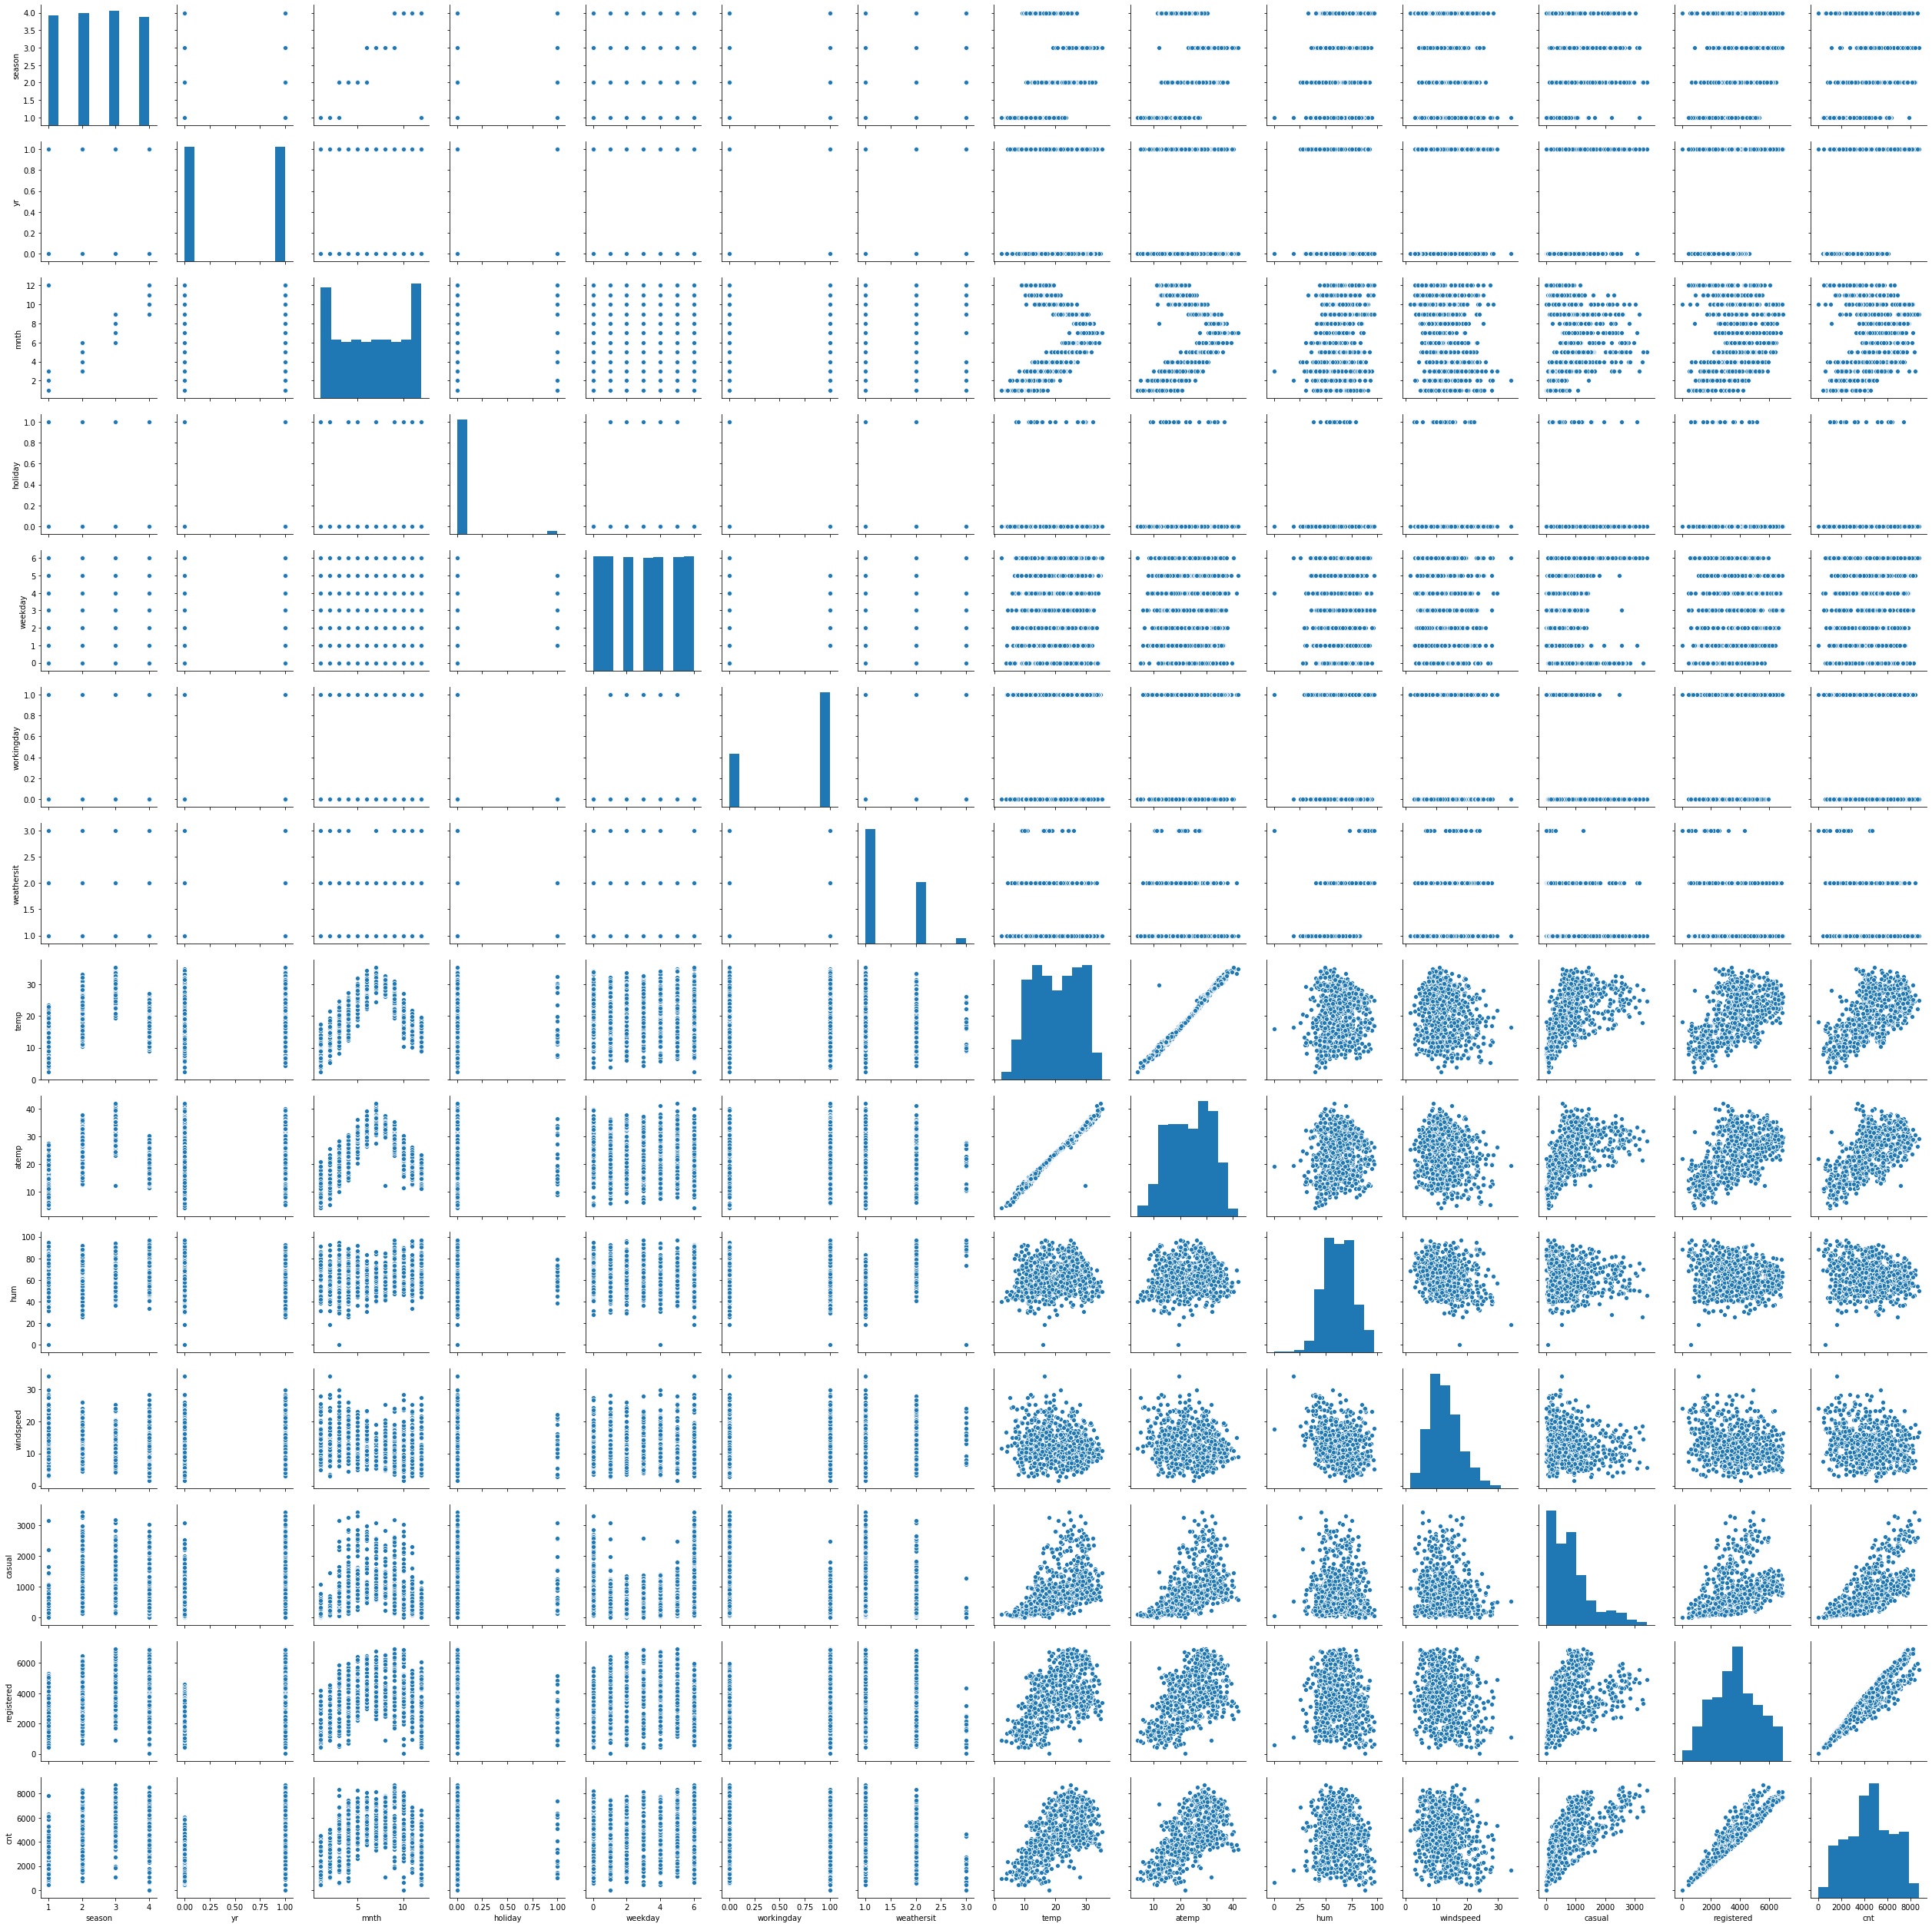

In [14]:
sns.pairplot(df)
plt.show()

#### Visualising Categorical Variables

Let's make a boxplot for some of these variables.

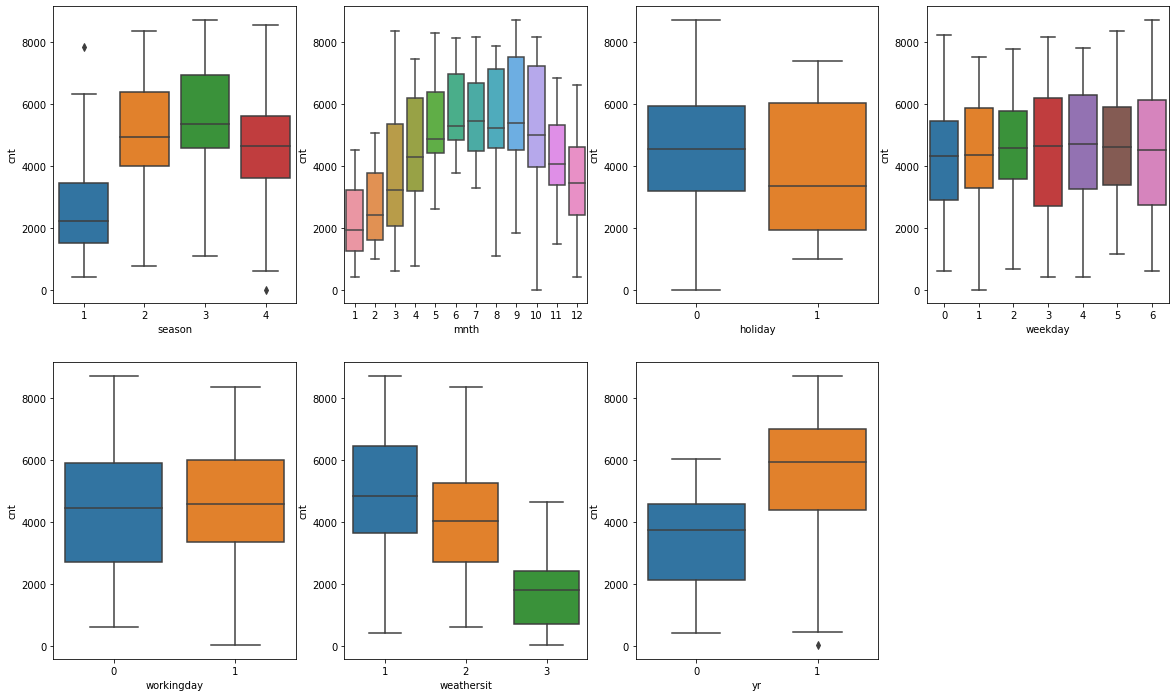

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

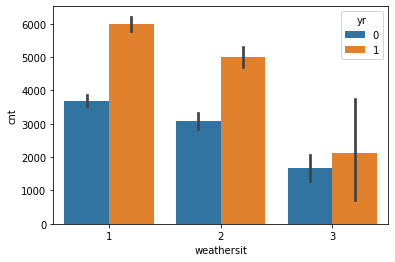

In [41]:
sns.barplot(x="weathersit", y="cnt", hue = 'yr', data=df)

Text(0, 0.5, 'weathersit_freq')

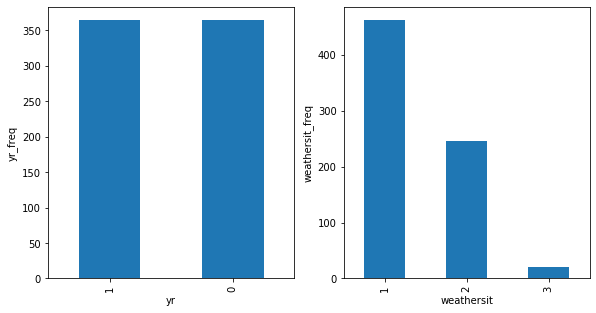

In [80]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
df['yr'].value_counts().plot(kind='bar')
plt.xlabel('yr') 
plt.ylabel('yr_freq')
plt.subplot(1,3,2)
df['weathersit'].value_counts().plot(kind='bar')
plt.xlabel('weathersit') 
plt.ylabel('weathersit_freq')

<h3>Uni Variate analysis</h3>

In [84]:
seasons_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weathersit_map = {
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}
workingday_map = {1: "Working", 0: "Non Workind"}
#  Set name value mapping
month_name_map = {i: date(datetime.now().year, i, 1).strftime('%B')
                  for i in range(1, 13)}
holiday_map = {1: "Holiday", 0: "Non Holiday"}
# Listing from Tuesday because in this file Tuesday is considered as 0
days_of_week = ["Tuesday", "Wednesday", "Thursday",
                "Friday", "Saturday", "Sunday", "Monday"]
weekday_map = {i: days_of_week[i] for i in range(len(days_of_week))}
year_map = {0: 2018, 1: 2019}
date_of_month_map = {i: i for i in range(1, 32)}
quarter_map = {1: "First", 2: "Second", 3: "Third", 4: "Fourth"}

In [199]:
df1 = df
# Defining the map function
def binary_map(x,dict):
    return x.map(dict)

#seasonmap = binary_map(seasons_map)
df1['season'] = df1['season'].replace(to_replace = seasons_map)
df1['yr'] = df1['yr'].replace(to_replace = year_map)
df1['mnth'] = df1['mnth'].replace(to_replace = month_name_map)
df1['holiday'] = df1['holiday'].replace(to_replace = holiday_map)
df1['weekday'] = df1['weekday'].replace(to_replace = weekday_map)
df1['workingday'] = df1['workingday'].replace(to_replace = workingday_map)
df1['weathersit'] = df1['weathersit'].replace(to_replace = weathersit_map)

In [200]:
df1.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Text(0, 0.5, 'weathersit_freq')

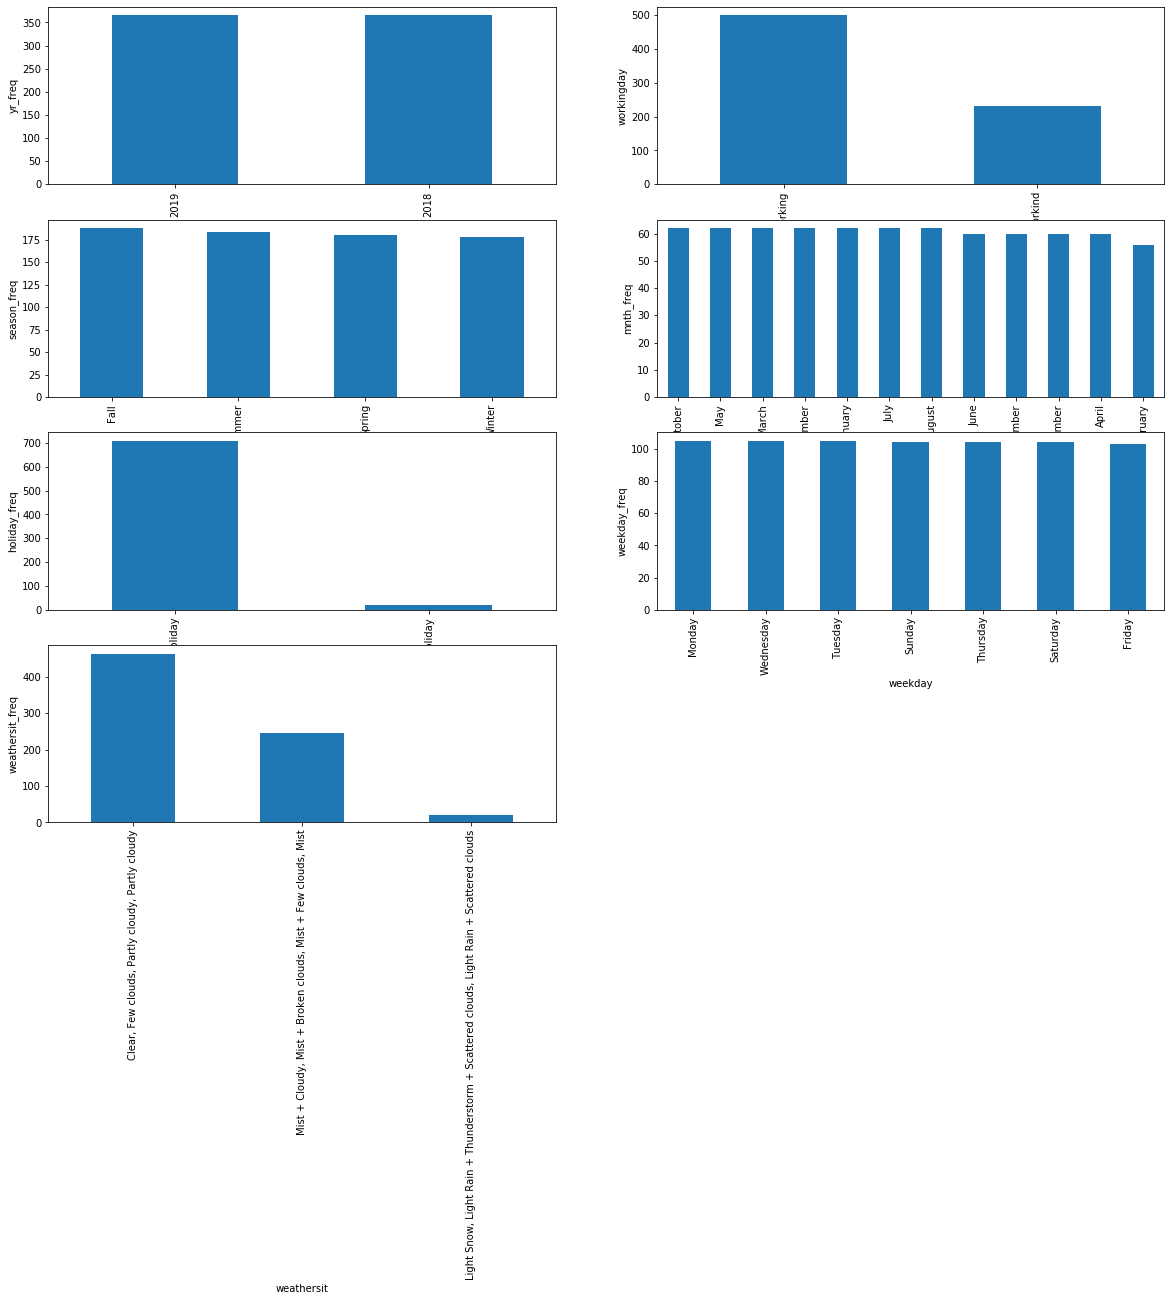

In [201]:
plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
df1['yr'].value_counts().plot(kind='bar')
plt.xlabel('yr') 
plt.ylabel('yr_freq')
plt.subplot(4,2,2)
df1['workingday'].value_counts().plot(kind='bar')
plt.xlabel('workingday') 
plt.ylabel('workingday')
plt.subplot(4,2,3)
df1['season'].value_counts().plot(kind='bar')
plt.xlabel('season') 
plt.ylabel('season_freq')
plt.subplot(4,2,4)
df1['mnth'].value_counts().plot(kind='bar')
plt.xlabel('mnth') 
plt.ylabel('mnth_freq')
plt.subplot(4,2,5)
df1['holiday'].value_counts().plot(kind='bar')
plt.xlabel('holiday') 
plt.ylabel('holiday_freq')
plt.subplot(4,2,6)
df1['weekday'].value_counts().plot(kind='bar')
plt.xlabel('weekday') 
plt.ylabel('weekday_freq')
plt.subplot(4,2,7)
df1['weathersit'].value_counts().plot(kind='bar')
plt.xlabel('weathersit') 
plt.ylabel('weathersit_freq')

**Conclusions:**

 1. Seasons are almost equally distributed
 2. We have data for complete two years
 3. Data is present for all months and all days
 4. Mostly weather was good

Text(0, 0.5, 'Total user counts')

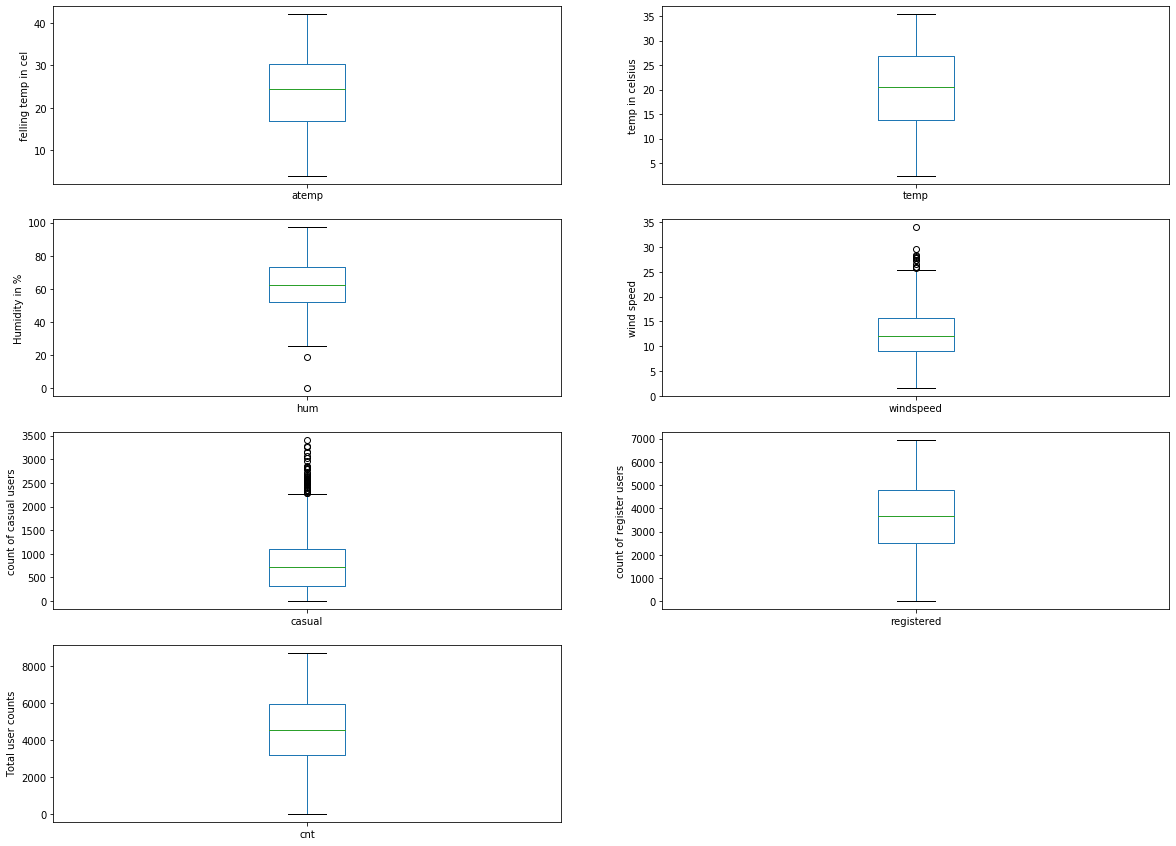

In [202]:
plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
df1['atemp'].plot(kind = 'box') 
plt.ylabel('felling temp in cel')
plt.subplot(4,2,2)
df1['temp'].plot(kind = 'box') 
plt.ylabel('temp in celsius')
plt.subplot(4,2,3)
df1['hum'].plot(kind = 'box') 
plt.ylabel('Humidity in %')
plt.subplot(4,2,4)
df1['windspeed'].plot(kind = 'box') 
plt.ylabel('wind speed')
plt.subplot(4,2,5)
df1['casual'].plot(kind = 'box') 
plt.ylabel('count of casual users')
plt.subplot(4,2,6)
df1['registered'].plot(kind = 'box') 
plt.ylabel('count of register users')
plt.subplot(4,2,7)
df1['cnt'].plot(kind = 'box') 
plt.ylabel('Total user counts')

**It is clear that 2019 has been better than 2018 for BoomBike**

Lets plot 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered' and 'cnt' plots against 'dteday'

In [203]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Text(0, 0.5, 'feeling temp in cel')

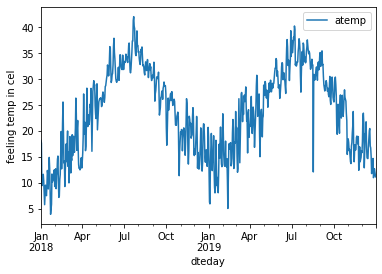

In [204]:
df1.plot(x= 'dteday',y = 'atemp',kind = 'line')
plt.ylabel('feeling temp in cel')

Text(0, 0.5, 'temp in celsius')

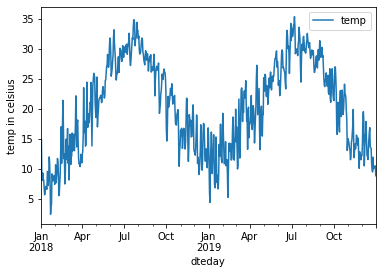

In [205]:
df1.plot(x= 'dteday',y = 'temp',kind = 'line')
plt.ylabel('temp in celsius')

Text(0, 0.5, 'Humidity in %')

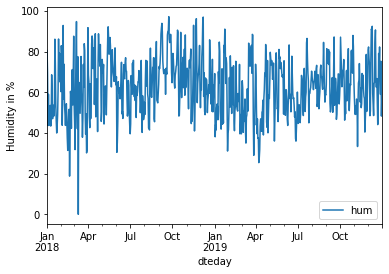

In [206]:
df1.plot(x= 'dteday',y = 'hum',kind = 'line') 
plt.ylabel('Humidity in %')

Text(0, 0.5, 'wind speed')

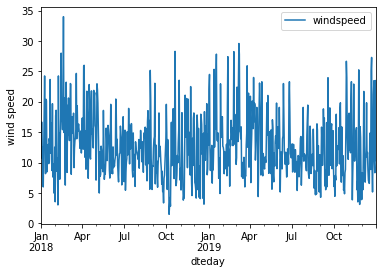

In [207]:
df1.plot(x= 'dteday',y = 'windspeed',kind = 'line') 
plt.ylabel('wind speed')

Text(0, 0.5, 'count of casual users')

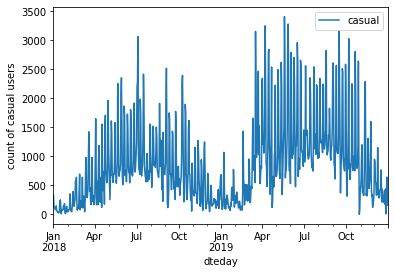

In [208]:
df1.plot(x= 'dteday',y = 'casual',kind = 'line') 
plt.ylabel('count of casual users')

Text(0, 0.5, 'count of register users')

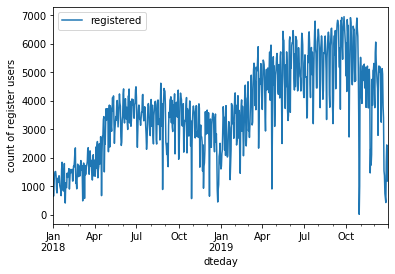

In [209]:
df1.plot(x= 'dteday',y = 'registered',kind = 'line')
plt.ylabel('count of register users')

Text(0, 0.5, 'Total user counts')

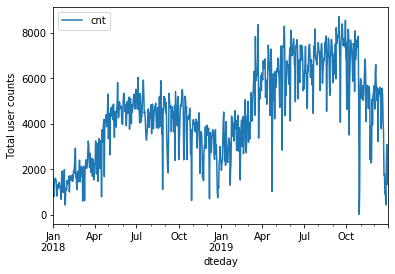

In [210]:
df1.plot(x= 'dteday',y = 'cnt',kind = 'line')
plt.ylabel('Total user counts')

Text(0, 0.5, 'Total user counts')

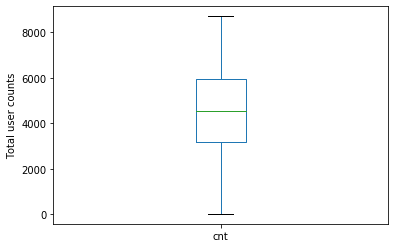

In [211]:
df1.plot(x= 'dteday',y = 'cnt',kind = 'box')
plt.ylabel('Total user counts')

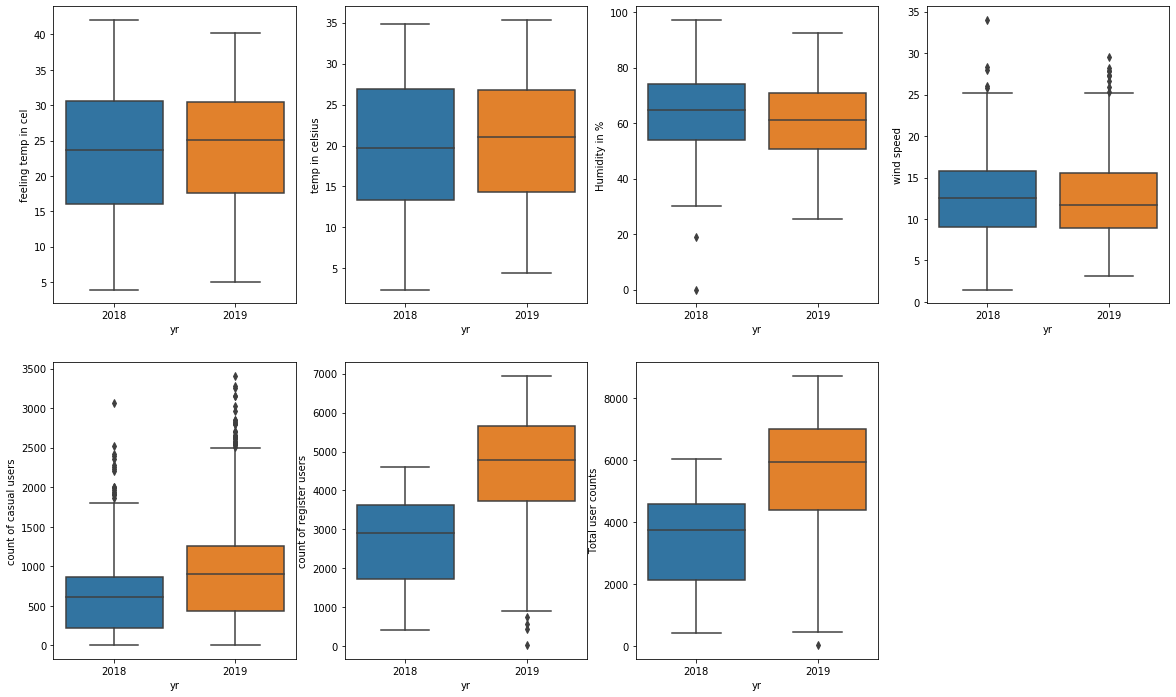

In [212]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'atemp', data = df)
plt.ylabel('feeling temp in cel')
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'temp', data = df)
plt.ylabel('temp in celsius')
plt.subplot(2,4,3)
sns.boxplot(x = 'yr', y = 'hum', data = df)
plt.ylabel('Humidity in %')
plt.subplot(2,4,4)
sns.boxplot(x = 'yr', y = 'windspeed', data = df)
plt.ylabel('wind speed')
plt.subplot(2,4,5)
sns.boxplot(x = 'yr', y = 'casual', data = df)
plt.ylabel('count of casual users')
plt.subplot(2,4,6)
sns.boxplot(x = 'yr', y = 'registered', data = df)
plt.ylabel('count of register users')
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.ylabel('Total user counts')
plt.show()

<h3>Scatter plots </h3>

Text(0.5, 0, 'temp in cel')

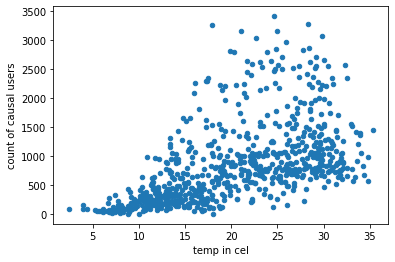

In [213]:
df1.plot(x= 'temp',y = 'casual',kind = 'scatter' )
plt.ylabel('count of causal users')
plt.xlabel('temp in cel')

Text(0.5, 0, 'temp in cel')

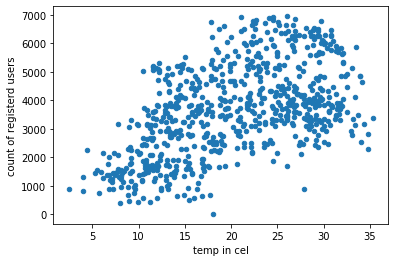

In [214]:
df1.plot(x= 'temp',y = 'registered',kind = 'scatter' )
plt.ylabel('count of registerd users')
plt.xlabel('temp in cel')

Text(0.5, 0, 'temp in cel')

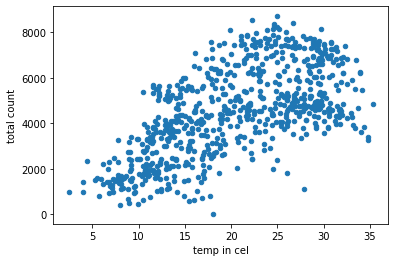

In [215]:
df1.plot(x= 'temp',y = 'cnt',kind = 'scatter' )
plt.ylabel('total count')
plt.xlabel('temp in cel')

User type Relationship

Text(0, 0.5, 'Total user counts')

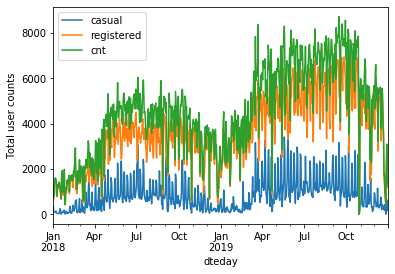

In [216]:
df1.plot(x= 'dteday',y = ['casual', 'registered', 'cnt'],kind = 'line')
plt.ylabel('Total user counts')

<h2>Bi-Variate Analysis</h2>

**Pair plot**

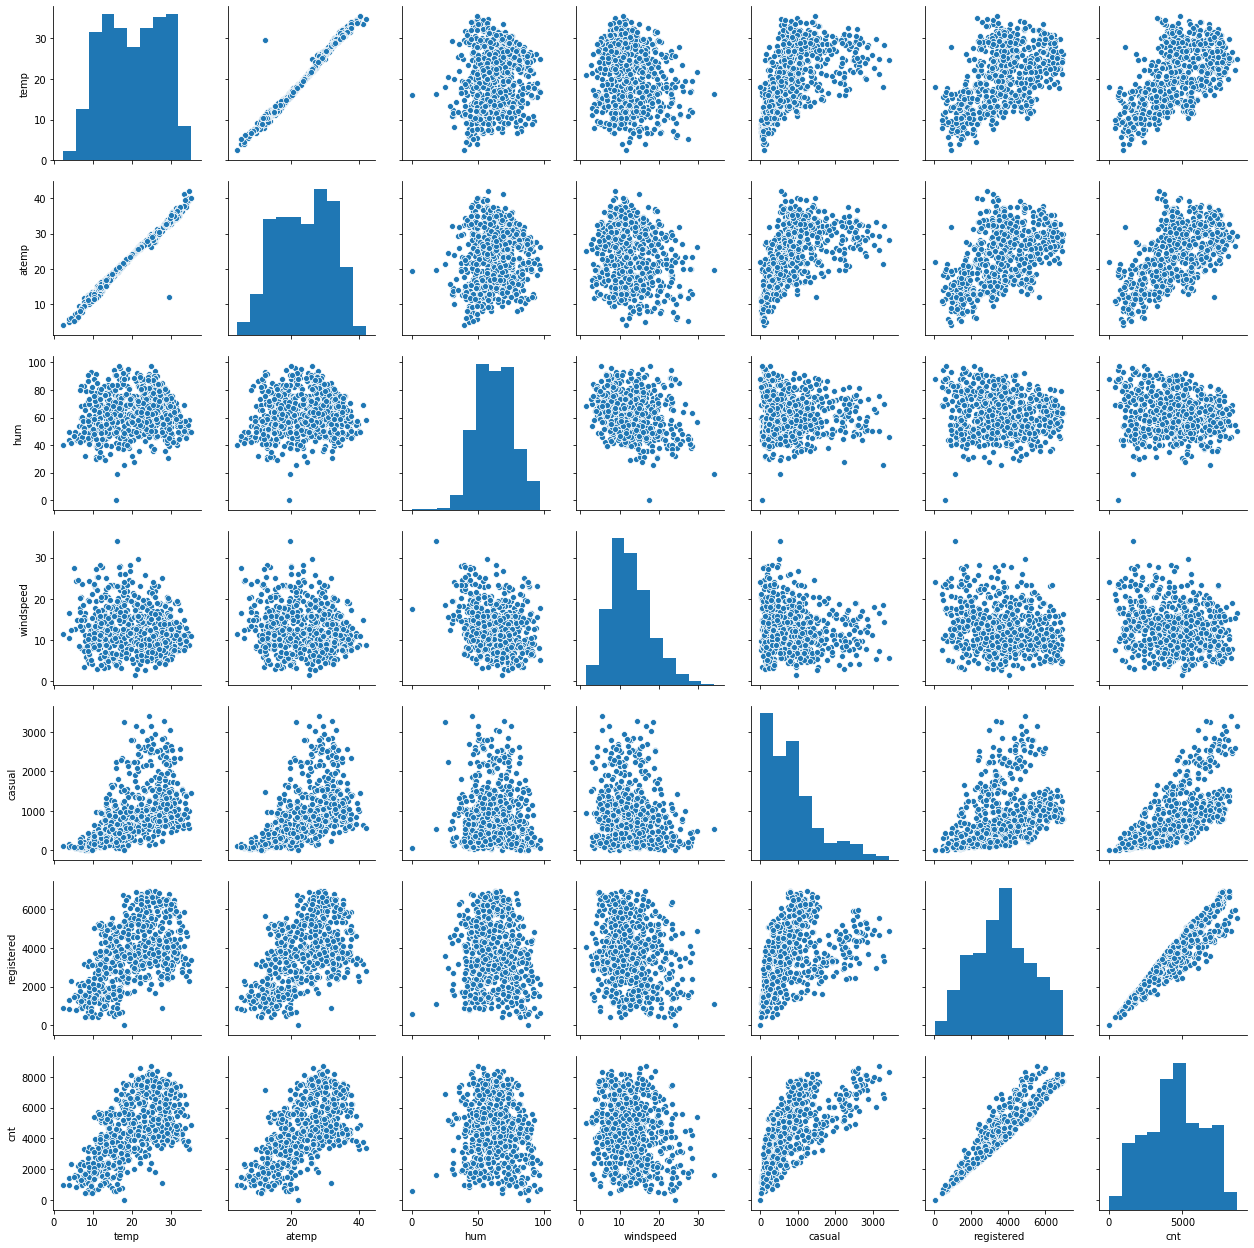

In [217]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(df1[numeric_columns])
plt.show()

###  temp is having best relationship with usage, i. e. in worm weather peple are more tend to use bikes   

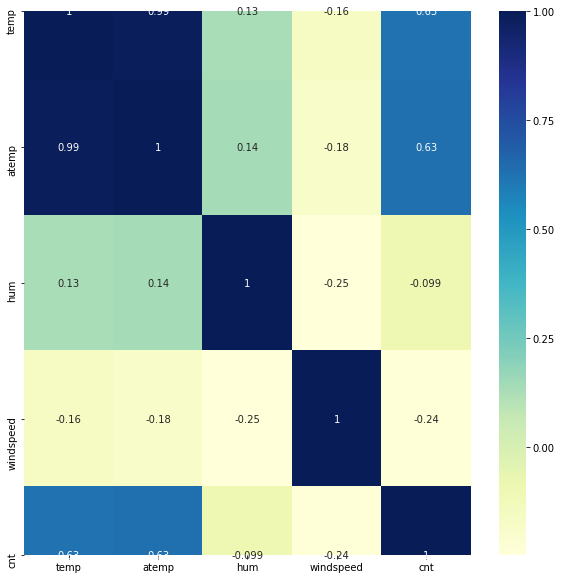

In [219]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(),
            annot=True, cmap="YlGnBu")
plt.show()


<h3>Multi Variate analysis</h3>

In [220]:
import pingouin as pg
pg.pairwise_corr(df1, columns=['temp', 'atemp', 'hum',
                              'windspeed', 'cnt'], method='pearson')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,temp,atemp,pearson,two-sided,730,0.991696,"[0.99, 0.99]",0.983461,0.983416,2.740013,0.000000e+00,nan,1.000000
1,temp,hum,pearson,two-sided,730,0.128565,"[0.06, 0.2]",0.016529,0.013823,0.129280,4.974344e-04,19.671,0.936743
2,temp,windspeed,pearson,two-sided,730,-0.158186,"[-0.23, -0.09]",0.025023,0.022341,-0.159526,1.757211e-05,458.51,0.990463
3,temp,cnt,pearson,two-sided,730,0.627044,"[0.58, 0.67]",0.393184,0.391515,0.736530,5.072391e-81,2.616e+77,1.000000
4,atemp,hum,pearson,two-sided,730,0.141512,"[0.07, 0.21]",0.020026,0.017330,0.142468,1.249500e-04,71.672,0.970205
5,atemp,windspeed,pearson,two-sided,730,-0.183876,"[-0.25, -0.11]",0.033811,0.031153,-0.185992,5.666061e-07,1.227e+04,0.998886
6,atemp,cnt,pearson,two-sided,730,0.630685,"[0.58, 0.67]",0.397764,0.396107,0.742553,3.199612e-82,4.093e+78,1.000000
7,hum,windspeed,pearson,two-sided,730,-0.248506,"[-0.32, -0.18]",0.061755,0.059174,-0.253820,9.769375e-12,5.196e+08,0.999999
8,hum,cnt,pearson,two-sided,730,-0.098543,"[-0.17, -0.03]",0.009711,0.006986,-0.098864,7.712423e-03,1.602,0.760320
9,windspeed,cnt,pearson,two-sided,730,-0.235132,"[-0.3, -0.17]",0.055287,0.052688,-0.239615,1.255721e-10,4.291e+07,0.999997


**Here we can see that temp<=>atemp have very high correlation so lets drop one and see the changes**

In [221]:
# Pairwise correlation without temp
pg.pairwise_corr(df, columns=['atemp', 'hum',
                              'windspeed', 'cnt'], method='pearson')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,atemp,hum,pearson,two-sided,730,0.141512,"[0.07, 0.21]",0.020026,0.017330,0.142468,1.249500e-04,71.672,0.970205
1,atemp,windspeed,pearson,two-sided,730,-0.183876,"[-0.25, -0.11]",0.033811,0.031153,-0.185992,5.666061e-07,1.227e+04,0.998886
2,atemp,cnt,pearson,two-sided,730,0.630685,"[0.58, 0.67]",0.397764,0.396107,0.742553,3.199612e-82,4.093e+78,1.000000
3,hum,windspeed,pearson,two-sided,730,-0.248506,"[-0.32, -0.18]",0.061755,0.059174,-0.253820,9.769375e-12,5.196e+08,0.999999
4,hum,cnt,pearson,two-sided,730,-0.098543,"[-0.17, -0.03]",0.009711,0.006986,-0.098864,7.712423e-03,1.602,0.760320
5,windspeed,cnt,pearson,two-sided,730,-0.235132,"[-0.3, -0.17]",0.055287,0.052688,-0.239615,1.255721e-10,4.291e+07,0.999997


In [222]:
df1.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,2018,January,Non Holiday,Monday,Non Workind,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,Spring,2018,January,Non Holiday,Tuesday,Non Workind,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,Spring,2018,January,Non Holiday,Wednesday,Working,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,Spring,2018,January,Non Holiday,Thursday,Working,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,Spring,2018,January,Non Holiday,Friday,Working,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [296]:
df1.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,2018,January,Non Holiday,Monday,Non Workind,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,Spring,2018,January,Non Holiday,Tuesday,Non Workind,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,Spring,2018,January,Non Holiday,Wednesday,Working,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,Spring,2018,January,Non Holiday,Thursday,Working,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,Spring,2018,January,Non Holiday,Friday,Working,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


<h2>Step 3. Data Preparation</h2>

### Create Dummies function

In [300]:
def dummies(data_frame: pd.DataFrame) -> pd.DataFrame:
    clean_df = pd.DataFrame()
    cat_cols = list(data_frame.select_dtypes(include=['object']).columns)
    for cat_col in cat_cols:
        dummies = pd.get_dummies(data_frame[cat_col], drop_first=True)
        dummies.columns = [cat_col + "_" +
                           str(i) for i in range(dummies.shape[1])]
        clean_df = pd.concat([clean_df, dummies], axis=1)
        #clean_df = pd.concat([clean_df, dummies], axis=1)

    return pd.concat([data_frame.drop(cat_cols, axis=1), clean_df], axis=1)

In [302]:
dum = dummies(df1)
dum.head()

,dteday,yr,temp,atemp,hum,windspeed,casual,registered,cnt,season_0,...,holiday_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,workingday_0,weathersit_0,weathersit_1
0,2018-01-01,2018,14.110847,18.18125,80.5833,10.749882,331,654,985,1,...,1,1,0,0,0,0,0,0,0,1
1,2018-01-02,2018,14.902598,17.68695,69.6087,16.652113,131,670,801,1,...,1,0,0,0,0,1,0,0,0,1
2,2018-01-03,2018,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,...,1,0,0,0,0,0,1,1,0,0
3,2018-01-04,2018,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,...,1,0,0,0,1,0,0,1,0,0
4,2018-01-05,2018,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,...,1,0,0,0,0,0,0,1,0,0


**We'll drop below columns:**

 - dteday : We have plotted necessary graphs and extrated required information
 - temp : Highly correlated with a temperature
 - casual & registered : cnt is sum of both and we are concentrating on total use in this study
 - yr : Only 2 years of data so hard to get any pattern

In [303]:
bike = dum.drop(
    ['dteday', 'temp', 'casual', 'registered', 'yr'], axis=1)
bike.head()

,atemp,hum,windspeed,cnt,season_0,season_1,season_2,mnth_0,mnth_1,mnth_2,...,holiday_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,workingday_0,weathersit_0,weathersit_1
0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [453]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(219, 28)


In [454]:
from sklearn.preprocessing import MinMaxScaler

In [455]:
scaler = MinMaxScaler()

Apply scaler() to all the numeric columns

In [456]:
num_vars= ['atemp', 'hum','windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()                             

,atemp,hum,windspeed,cnt,season_0,season_1,season_2,mnth_0,mnth_1,mnth_2,...,holiday_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,workingday_0,weathersit_0,weathersit_1
653,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
576,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
426,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
728,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
482,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [457]:
df_train[num_vars].describe()

,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.513620
std,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420
50%,0.526811,0.653714,0.296763,0.518638
75%,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [458]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [459]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()


In [460]:
lr.params

const    0.162924
atemp    0.683633
dtype: float64

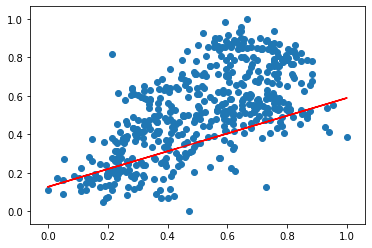

In [461]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [462]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.10e-61
Time:                        18:09:58   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

### Adding another variable

The R-squared value obtained is `0.418`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `hum`.

In [463]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'windspeed','hum']]

In [464]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.452005
atemp        0.683025
windspeed   -0.227819
hum         -0.331646
dtype: float64

In [465]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           2.90e-70
Time:                        18:10:03   Log-Likelihood:                 202.43
No. Observations:                 510   AIC:                            -396.9
Df Residuals:                     506   BIC:                            -379.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4520      0.044     10.357      0.0

### Adding all the variables to the model

In [466]:
bike.columns

Index(['atemp', 'hum', 'windspeed', 'cnt', 'season_0', 'season_1', 'season_2',
       'mnth_0', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'holiday_0', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'workingday_0', 'weathersit_0', 'weathersit_1'],
      dtype='object')

In [467]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const           0.350276
atemp           0.624613
hum            -0.274370
windspeed      -0.173057
season_0       -0.038157
season_1        0.044111
season_2        0.139288
mnth_0          0.005234
mnth_1         -0.067382
mnth_2         -0.031133
mnth_3         -0.043558
mnth_4         -0.081157
mnth_5         -0.042251
mnth_6         -0.006374
mnth_7         -0.010168
mnth_8         -0.072082
mnth_9         -0.035451
mnth_10         0.056469
holiday_0       0.064527
weekday_0       0.034013
weekday_1      -0.008487
weekday_2       0.003112
weekday_3      -0.017205
weekday_4      -0.009030
weekday_5      -0.000150
workingday_0    0.039544
weathersit_0   -0.255765
weathersit_1   -0.045868
dtype: float64

In [468]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     26.95
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           2.13e-77
Time:                        18:10:07   Log-Likelihood:                 267.07
No. Observations:                 510   AIC:                            -480.1
Df Residuals:                     483   BIC:                            -365.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3503      0.086      4.064   

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [469]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [470]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,workingday_0,inf
22,weekday_4,inf
18,weekday_0,inf
17,holiday_0,inf
1,hum,38.61
0,atemp,32.84
3,season_0,12.35
5,season_2,12.12
4,season_1,7.91
15,mnth_9,6.50


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

<h3>We'll start removing column with minimal importance ie high p and high VIF first</h3>

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `weekday_5`,`weekday_2`,`mnth_6`,`mnth_0` as it has a very high p-value. Let's go ahead and drop this variables

In [471]:
X = X_train.drop(['weekday_5','weekday_2','mnth_6','mnth_0'], 1,)
X.columns

Index(['atemp', 'hum', 'windspeed', 'season_0', 'season_1', 'season_2',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'holiday_0', 'weekday_0', 'weekday_1', 'weekday_3',
       'weekday_4', 'workingday_0', 'weathersit_0', 'weathersit_1'],
      dtype='object')

In [472]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [473]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     32.10
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           2.33e-80
Time:                        18:10:30   Log-Likelihood:                 267.03
No. Observations:                 510   AIC:                            -488.1
Df Residuals:                     487   BIC:                            -390.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3512      0.075      4.704   

In [474]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,holiday_0,inf
20,workingday_0,inf
19,weekday_4,inf
16,weekday_0,inf
1,hum,35.99
0,atemp,24.52
5,season_2,9.94
3,season_0,5.89
2,windspeed,5.05
12,mnth_8,4.44


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, has a very high VIF-value of `inf`. Let's go ahead and drop this variables

In [475]:
X = X.drop(['weekday_0','weekday_4','workingday_0','holiday_0'], 1,)
X.columns

Index(['atemp', 'hum', 'windspeed', 'season_0', 'season_1', 'season_2',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'weekday_1', 'weekday_3', 'weathersit_0',
       'weathersit_1'],
      dtype='object')

In [476]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [477]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     35.99
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           2.29e-80
Time:                        18:10:42   Log-Likelihood:                 261.29
No. Observations:                 510   AIC:                            -482.6
Df Residuals:                     490   BIC:                            -397.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4530      0.061      7.435   

In [478]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,32.74
0,atemp,20.26
5,season_2,9.53
3,season_0,5.33
2,windspeed,4.76
12,mnth_8,4.44
13,mnth_9,4.39
4,season_1,3.54
6,mnth_1,3.19
8,mnth_3,2.53


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables as it has a very high p-value. Let's go ahead and drop this variables

In [479]:
X = X.drop(['weekday_1','weekday_3','mnth_7'], 1,)

In [480]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [481]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     42.99
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           8.97e-83
Time:                        18:11:23   Log-Likelihood:                 261.23
No. Observations:                 510   AIC:                            -488.5
Df Residuals:                     493   BIC:                            -416.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4568      0.059      7.746   

In [482]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,32.69
0,atemp,19.52
5,season_2,9.52
3,season_0,5.31
2,windspeed,4.62
11,mnth_8,4.42
12,mnth_9,4.39
6,mnth_1,3.18
4,season_1,2.86
8,mnth_3,2.53


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables as it has a very high p-value. Let's go ahead and drop this variables

In [483]:
X = X.drop(['mnth_9','mnth_3','mnth_2'], 1,)

In [484]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [485]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     52.85
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           6.63e-85
Time:                        18:11:30   Log-Likelihood:                 260.18
No. Observations:                 510   AIC:                            -492.4
Df Residuals:                     496   BIC:                            -433.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4369      0.056      7.762   

In [486]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,29.58
0,atemp,17.63
2,windspeed,4.57
5,season_2,3.88
3,season_0,3.74
4,season_1,2.76
12,weathersit_1,2.29
9,mnth_8,1.79
7,mnth_4,1.69
6,mnth_1,1.48


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables as it has a very high p-value. Let's go ahead and drop this variables

In [487]:
X = X.drop(['mnth_8','mnth_5','mnth_1'], 1,)

In [488]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [489]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     67.85
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.77e-86
Time:                        18:11:40   Log-Likelihood:                 257.43
No. Observations:                 510   AIC:                            -492.9
Df Residuals:                     499   BIC:                            -446.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4176      0.055      7.575   

In [490]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,27.46
0,atemp,14.83
2,windspeed,4.49
3,season_0,3.71
5,season_2,3.11
4,season_1,2.71
9,weathersit_1,2.27
6,mnth_4,1.59
7,mnth_10,1.38
8,weathersit_0,1.24



Now remove atemp having highest VIF

In [491]:
X = X.drop(['season_1'], 1,)

In [492]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [493]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     74.62
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.12e-86
Time:                        18:13:24   Log-Likelihood:                 255.65
No. Observations:                 510   AIC:                            -491.3
Df Residuals:                     500   BIC:                            -448.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4609      0.050      9.191   

In [494]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,22.78
0,atemp,14.48
2,windspeed,3.92
3,season_0,2.43
8,weathersit_1,2.23
4,season_2,2.00
5,mnth_4,1.38
7,weathersit_0,1.21
6,mnth_10,1.19


In [495]:
Z = X.drop(['hum'], 1,)

In [496]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(Z)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     78.26
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           2.90e-83
Time:                        18:14:56   Log-Likelihood:                 245.26
No. Observations:                 510   AIC:                            -472.5
Df Residuals:                     501   BIC:                            -434.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3134      0.039      8.021   

In [ ]:
We can see that the equation of our best fitted line is:

cnt = 0.563  \times  atemp - 0.108  \times  windspeed  - 0.102 \times season_0 + 0.047 \times season_2 - 0.084 \times mnth_4 + 0.048 \times mnth_10 - 0.0319 \times weathersit_0 - 0.0834 \times weathersit_1

In [497]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = Z.columns
vif['VIF'] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.88
0,atemp,3.87
2,season_0,1.59
7,weathersit_1,1.51
3,season_2,1.37
4,mnth_4,1.34
5,mnth_10,1.19
6,weathersit_0,1.08


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [498]:
y_train_cnt = lr_8.predict(X_train_lm)

Text(0.5, 0, 'Errors')

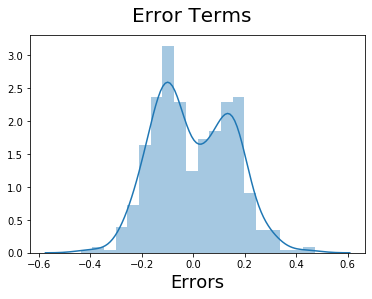

In [500]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [501]:
num_vars= ['atemp', 'hum','windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [502]:
df_test.describe()

,atemp,hum,windspeed,cnt,season_0,season_1,season_2,mnth_0,mnth_1,mnth_2,...,holiday_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,workingday_0,weathersit_0,weathersit_1
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,...,0.963470,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.698630,0.027397,0.319635
std,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,...,0.188034,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.459904,0.163612,0.467403
min,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [504]:
y_test = df_test.pop('cnt')
X_test = df_test

In [505]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [506]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['weekday_5','weekday_2','mnth_6','mnth_0','weekday_0','weekday_4','workingday_0','holiday_0','weekday_1','weekday_3','mnth_7','mnth_9','mnth_3','mnth_2','mnth_8','mnth_5','mnth_1','season_1','hum'], axis = 1)

In [508]:
# Making predictions using the fourth model

y_pred_m4 = lr_8.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

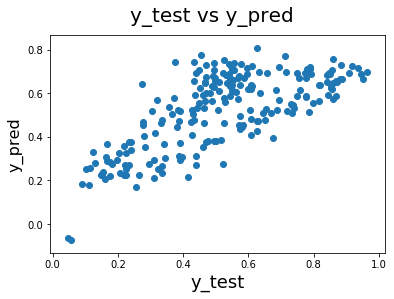

In [509]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

We can see that the equation of our best fitted line is:

cnt = 0.563  X atemp - 0.108  X  windspeed  - 0.102 X season_0 + 0.047 X season_2 - 0.084 X mnth_4 + 0.048 X mnth_10 - 0.0319 X weathersit_0 - 0.0834 X weathersit_1